<a href="https://colab.research.google.com/github/jrebull/ChileSistemasRecomendacion/blob/main/JavierRebull_1_practico_clase1_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Version GitHub:

# 🎓 Magister en Inteligencia Artificial

<center>

[![Institution](https://img.shields.io/badge/Institution-Pontificia%20Universidad%20Católica%20de%20Chile-003A70?style=for-the-badge&logo=graduation-cap)](https://www.uc.cl)
[![Course](https://img.shields.io/badge/Course-Sistemas%20de%20Recomendación-FF6B6B?style=for-the-badge&logo=star)](https://www.uc.cl)
[![Activity](https://img.shields.io/badge/Práctico%20Clase%201-Google%20Colab-F9AB00?style=for-the-badge&logo=googlecolab)](https://colab.research.google.com)

</center>

---

## 🎬 **Sistemas de Recomendación**

### 👨‍🏫 **Equipo Docente**
- **Profesor:** Vicente Domínguez
- **Ayudante:** Michelle Madrid

---

## **<font color="#895cf9">Práctico Clase 1: Comparación de Algoritmos de Recomendación</font>**

### 📌 **Detalles de la Actividad**
- **Dataset:** MovieLens
- **Formato de entrega:** Notebook
- **Modalidad:** Individual

---

## 👨‍🎓 **Alumno**

<center>
<img src="https://iili.io/KuvsGKx.png" alt="Javier Augusto Rebull Saucedo" width="150">

### **Javier Augusto Rebull Saucedo**
**Programa:** MNA - Tecnológico de Monterrey
A01795838@tec.mx
📚 Estudiante Invitado

</center>

---

## **<font color="orange">Objetivo del Práctico</font>**

En este práctico implementaremos y compararemos los resultados de algoritmos clásicos de recomendación utilizando el dataset MovieLens:
- Most Popular (Análisis Exploratorio)
- User-based KNN
- Item-based KNN

---

Utilizaremos la librería surprise (https://surpriselib.com/)

---

## **<font color="orange">Introducción</font>**

Los sistemas de recomendación se han convertido en una herramienta fundamental en la era digital, transformando la manera en que los usuarios descubren y consumen contenido. Desde plataformas de streaming como Netflix y Spotify, hasta sitios de comercio electrónico como Amazon, estos sistemas ayudan a filtrar la sobrecarga de información y personalizar la experiencia del usuario.


### **<font color="\#895cf9">Contexto y Motivación</font>**


En un mundo donde la cantidad de opciones disponibles supera ampliamente la capacidad humana de exploración, los sistemas de recomendación cumplen un rol crucial. Según estudios recientes, más del 80% del contenido consumido en plataformas de streaming proviene de recomendaciones algorítmicas, lo que demuestra su impacto en el comportamiento del usuario y el éxito de las plataformas digitales.

### **<font color="\#895cf9">Objetivos del Práctico</font>**

Este trabajo práctico tiene como objetivos principales:

1. **Implementar y comparar** diferentes algoritmos de recomendación clásicos utilizando la librería Surprise
2. **Analizar el comportamiento** de los métodos de filtrado colaborativo basados en usuarios (User-Based) e ítems (Item-Based)
3. **Evaluar el desempeño** mediante la métrica RMSE (Root Mean Square Error)
4. **Estudiar la sensibilidad** de los hiperparámetros, específicamente el número de vecinos (K) en KNN
5. **Comprender las ventajas y limitaciones** de cada enfoque en contextos reales

### **<font color="\#895cf9">Dataset: MovieLens</font>**


Utilizaremos el dataset MovieLens, uno de los benchmarks más populares en investigación de sistemas de recomendación. Este dataset contiene calificaciones de películas realizadas por usuarios reales, lo que lo convierte en un escenario ideal para evaluar algoritmos de filtrado colaborativo.

### **<font color="\#895cf9">Metodología</font>**

El análisis seguirá una estructura sistemática que incluye análisis exploratorio, implementación de algoritmos, comparación cuantitativa, análisis de sensibilidad e interpretación de resultados.

## **<font color="orange">Configuración inicial</font>**

In [1]:
# descarga de datasets de train, test e información de items
!gdown 1gmOrtPpZpHJ0HeBwtne-kA8Bll4rFWW7
!gdown 1bnLJUEIRx13k4nxN7x7Fa-3L37rXre73
!gdown 1i92TtKsgf_3ffef8EVLH9NNArxvF-cMo

Downloading...
From: https://drive.google.com/uc?id=1gmOrtPpZpHJ0HeBwtne-kA8Bll4rFWW7
To: /content/u.item
100% 236k/236k [00:00<00:00, 81.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bnLJUEIRx13k4nxN7x7Fa-3L37rXre73
To: /content/u2.base
100% 1.58M/1.58M [00:00<00:00, 50.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1i92TtKsgf_3ffef8EVLH9NNArxvF-cMo
To: /content/u2.test
100% 395k/395k [00:00<00:00, 115MB/s]


vemos los nombres de los archivos descargados:

In [2]:
ls

sample_data/  u2.base  u2.test  u.item


instalacion e importacion de librerias:

In [4]:
# instalacion de libreria surprise
!pip3 install scikit-surprise > /dev/null 2>&1 && echo "OK todo Instalado"

OK todo Instalado


In [1]:
!pip install numpy==1.26.4

In [2]:
# --- Standard Libraries ---
import warnings

# --- Data Manipulation ---
import numpy as np
import pandas as pd

# --- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning (Surprise for Recommender Systems) ---
from surprise import Reader, Dataset
from surprise import NormalPredictor, KNNWithMeans, SVD
from surprise.accuracy import rmse
from surprise.model_selection import cross_validate

# --- Utilities ---
from tqdm.notebook import tqdm      # Progress bars for loops

# --- Jupyter/IPython Specific ---
%matplotlib inline

# --- Configuration ---
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

## **<font color="orange">Análisis exploratorio de datos</font>**

### Datos de entrenamiento:

In [3]:
df_train = pd.read_csv('u2.base',
                         sep='\t',
                         names=['userid', 'itemid', 'rating', 'timestamp'],
                         header=None)
df_train.head()

,userid,itemid,rating,timestamp
0,1,3,4,878542960
1,1,4,3,876893119
2,1,5,3,889751712
3,1,6,5,887431973
4,1,7,4,875071561


### Datos de test:
- Se tienen que repetir los usuarios y los items del set de entrenamiento.
- La tarea es precedir el rating de estos items.

In [4]:
df_test = pd.read_csv('u2.test',
                         sep='\t',
                         names=['userid', 'itemid', 'rating', 'timestamp'],
                         header=None)
df_test.head()

,userid,itemid,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,8,1,875072484
3,1,9,5,878543541
4,1,21,1,878542772


Nombres de películas y metadata:

In [5]:
# Cargamos el dataset con los items
columns = ['movieid', 'title', 'release_date', 'video_release_date', \
           'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', \
           'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', \
           'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', \
           'Thriller', 'War', 'Western']

df_items = pd.read_csv('u.item',
                        sep='|',
                        index_col=0,
                        names = columns,
                        header=None,
                        encoding='latin-1')

# reset index
df_items = df_items.reset_index()

# diccionario que entrega nombre de la pelicula con el id
dict_item_title = {idx:title for idx, title in zip(df_items.movieid, df_items.title)}

df_items.head()

,movieid,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Estadísticas de ratings:

In [9]:
df_train.describe()[['rating']]

,rating
count,80000.000000
mean,3.526463
std,1.124429
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


### Para entender los Géneros de las Péliculas analizadas

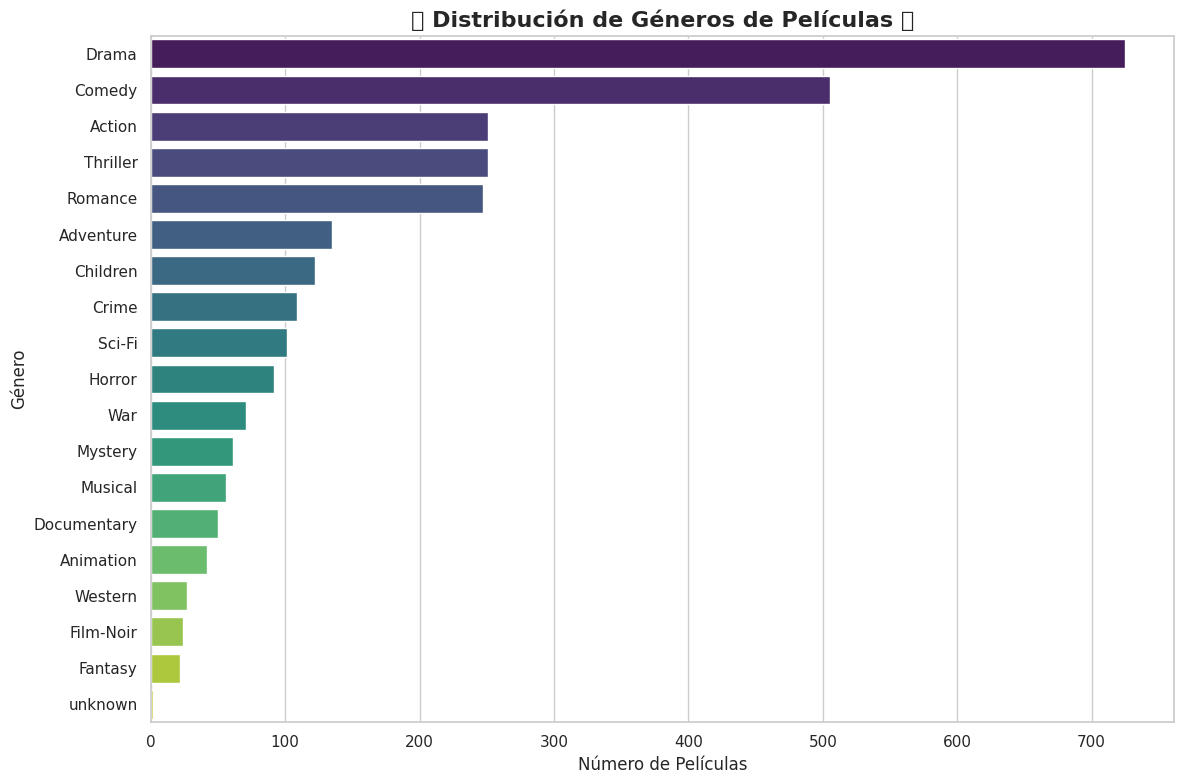


📊 Conteo de Películas por Género:


,Número de Películas
Drama,725
Comedy,505
Action,251
Thriller,251
Romance,247
Adventure,135
Children,122
Crime,109
Sci-Fi,101
Horror,92


In [25]:
# 1. Identificar las columnas de género
#    (Todas desde 'unknown' hasta 'Western')
genre_columns = df_items.columns[df_items.columns.get_loc('unknown'):]

# 2. Calcular el conteo de películas por género
genre_counts = df_items[genre_columns].sum().sort_values(ascending=False)

# 3. Crear la visualización
plt.figure(figsize=(12, 8)) # Ajusta el tamaño si es necesario
sns.set_style("whitegrid")

# Usar una paleta de colores atractiva
# Puedes probar otras paletas: "viridis", "magma", "plasma", "rocket", "mako"
palette = sns.color_palette("viridis", len(genre_counts))

# Crear el gráfico de barras horizontales
barplot = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=palette, orient='h')

plt.title('🎬 Distribución de Géneros de Películas 🍿', fontsize=16, fontweight='bold')
plt.xlabel('Número de Películas', fontsize=12)
plt.ylabel('Género', fontsize=12)

# Añadir etiquetas con el número exacto en cada barra (opcional pero útil)
# for index, value in enumerate(genre_counts.values):
#     plt.text(value + 5, index, str(value), va='center') # Ajusta '+5' según necesites

plt.tight_layout() # Ajusta el layout para que no se corten las etiquetas
plt.show()

# Mostrar la tabla de conteos (opcional)
print("\n📊 Conteo de Películas por Género:")
display(genre_counts.to_frame(name='Número de Películas'))

## <font color="orange">1. COMENTE LOS RESULTADOS (1 PTO):

RESPONDER AQUI</font>


### Comentario sobre el Análisis Exploratorio de Datos (EDA) 🔍🎬

> El análisis exploratorio inicial nos da una visión general de los datos disponibles para construir el sistema de recomendación:
>
> 1.  **Estructura de Datos:** Disponemos de:
>     * Un **conjunto de entrenamiento (`u2.base`)** y uno de **test (`u2.test`)**, ambos con el formato `userid`, `itemid`, `rating`, `timestamp`. Esto es crucial para entrenar y evaluar los modelos de forma separada.
>     * Un archivo de **metadatos de ítems (`u.item`)** que incluye el `movieid`, `title` y **columnas binarias para 19 géneros** (desde 'unknown' hasta 'Western'). Esto permite entender el contenido y podría usarse para enfoques basados en contenido o híbridos.
>
> 2.  **Análisis de las Calificaciones (Estrellas ⭐):**
>     * El conjunto de entrenamiento contiene **80,000 calificaciones**.
>     * **Tendencia Positiva:** La **calificación promedio (media)** es **3.53** (en escala 1-5), y la **mediana** es **4.0**. Esto sugiere un **sesgo positivo**: los usuarios tienden a calificar películas que les gustan o, al menos, las que deciden evaluar, obtienen mayormente calificaciones favorables (el 75% son ≥ 3).
>     * **Variabilidad Moderada:** La **desviación estándar (1.12)** indica que, aunque la tendencia es positiva, las opiniones **no son uniformes**. Hay una dispersión considerable alrededor de la media, reflejando diversidad de gustos o percepciones sobre las mismas películas.
>
> 3.  **Distribución de Géneros 🎭:**
>     * El catálogo es **dominado por Drama (725 películas) y Comedia (505)**.
>     * Géneros como Acción, Thriller y Romance también son muy frecuentes (>240 películas cada uno).
>     * Hay **géneros mucho menos representados** (ej. Fantasy, Film-Noir, Western < 30 películas) y un par de películas clasificadas como 'unknown'.
>     * Esta **distribución desigual** de géneros es importante: el sistema podría tener más facilidad para recomendar en géneros populares (más datos) y enfrentar desafíos en los géneros de nicho.
>
> **Implicación General:** Los datos muestran patrones típicos: un sesgo hacia calificaciones positivas y una distribución desigual tanto en la popularidad de las películas (como se vio en el análisis de "cola larga") como en la representación de géneros. Estos factores (sesgo, dispersión, cola larga, desbalance de géneros) deben considerarse al diseñar y evaluar los algoritmos de recomendación.


Cuantos usuarios e items distintos tenemos en el set de entrenamiento:

In [10]:
print("Users:", df_train["userid"].nunique())
print("Items:", df_train["itemid"].nunique())

Users: 943
Items: 1648


Número de interacciones por item:

In [11]:
items = df_train.groupby(["itemid"]).count()['userid']
items.describe()

,userid
count,1648.000000
mean,48.543689
std,64.950707
min,1.000000
25%,6.000000
50%,22.000000
75%,65.000000
max,461.000000


## <font color="orange">2. COMENTE LOS RESULTADOS (1 PTO):

RESPONDER AQUI</font>


### Comentario sobre Usuarios, Ítems y Distribución de Popularidad 👥🎬📉

> El análisis de la composición y actividad dentro del conjunto de entrenamiento revela información clave sobre la escala y la dinámica del dataset:
>
> 1.  **Dimensiones del Dataset:**
>     * **Usuarios Únicos:** Hay **943** usuarios distintos que han proporcionado calificaciones.
>     * **Ítems (Películas) Únicos:** El catálogo contiene **1648** películas únicas que han recibido al menos una calificación.
>
> 2.  **Distribución de la Popularidad de las Películas (Interacciones por Ítem):**
>     * El análisis de cuántas calificaciones recibe cada película confirma una **distribución de "cola larga" (long-tail)** muy pronunciada:
>         * **Asimetría:** La **media (48.54)** de calificaciones por película es significativamente **mayor que la mediana (22)**. Esto indica que unas pocas películas muy populares ("hits") reciben muchísimas calificaciones (la más popular tiene **461**) y tiran del promedio hacia arriba.
>         * **Alta Variabilidad:** La **desviación estándar (64.95)**, al ser mayor que la media, subraya la enorme **dispersión** en la popularidad. Hay una gran diferencia entre las películas más vistas y las menos vistas.
>         * **Cabeza vs. Cola:**
>             * **Cabeza (Head):** Un pequeño grupo domina. El 25% de las películas más populares recibieron entre 65 y 461 calificaciones.
>             * **Cola Larga (Tail):** La gran mayoría son de nicho. El **50% de las películas** tienen **22 calificaciones o menos**, y el 25% menos popular apenas tiene entre **1 y 6** calificaciones.
>
> **Implicaciones:** Esta estructura (número moderado de usuarios/ítems, pero con popularidad muy concentrada en pocos ítems) es típica y presenta desafíos conocidos:
> * **Sparsity (Dispersión):** Aunque no se calcula aquí, esta distribución sugiere una matriz usuario-ítem muy dispersa (muchas celdas vacías).
> * **Cold Start:** Será más difícil hacer recomendaciones para ítems con muy pocas calificaciones (en la cola larga) o para usuarios nuevos.
> * **Balance:** El recomendador debe ser capaz de sugerir tanto los "hits" de la cabeza como los descubrimientos relevantes de la cola larga.

Item con más interacciones (más populares):

In [12]:
most_active_items = items.sort_values(ascending=False)

most_active_items = most_active_items.to_frame().reset_index().rename(columns={"userid": "interactions"})

most_active_items['title'] = [dict_item_title[x] for x in most_active_items.itemid]

most_active_items.head(10)

,itemid,interactions,title
0,50,461,Star Wars (1977)
1,100,414,Fargo (1996)
2,258,409,Contact (1997)
3,181,406,Return of the Jedi (1983)
4,294,402,Liar Liar (1997)
5,286,397,"English Patient, The (1996)"
6,288,360,Scream (1996)
7,1,358,Toy Story (1995)
8,121,351,Independence Day (ID4) (1996)
9,300,345,Air Force One (1997)


## <font color="orange">3. COMENTE LOS RESULTADOS (1 PTO):

RESPONDER AQUI</font>



Comentario sobre los Ítems Más Populares (Cabeza de la Distribución) 🎬⭐

> Esta tabla muestra las **10 películas con el mayor número de interacciones (calificaciones)** en el conjunto de entrenamiento. Estas representan la **"cabeza" (head)** de la distribución de popularidad que comentamos anteriormente.
>
> * **Películas Dominantes:** Claramente, películas icónicas como **Star Wars (1977)** (461 interacciones), **Fargo (1996)** (414 interacciones) y **Return of the Jedi (1983)** (406 interacciones) son extremadamente populares dentro de este dataset.
> * **Confirmación de la Cola Larga:** El hecho de que la película #1 (Star Wars) tenga **461 interacciones** mientras que la mediana de interacciones para todas las películas es solo **22** (como vimos antes), ilustra perfectamente la enorme diferencia de popularidad y confirma la naturaleza de "cola larga" de los datos. Estas pocas películas reciben una cantidad desproporcionada de atención.

Concentración de interacciones en 20% de usuarios más activos:

In [13]:
proportion = 0.2
N = int(df_train.userid.nunique() * proportion)
interactions_by_active_items = most_active_items[:N]['interactions'].sum() / items.sum() * 100
print("{:.2f}% de las interacciones viene de los {} usuarios más activos ({:.0f}%)".format(
    interactions_by_active_items, N, proportion*100))

46.16% de las interacciones viene de los 188 usuarios más activos (20%)


## <font color="orange">4. COMENTE LOS RESULTADOS (1 PTO):
RESPONDER AQUI</font>


> El análisis revela una **concentración significativa de la actividad** en un grupo reducido de usuarios, siguiendo un patrón similar al **Principio de Pareto (regla 80/20)**:
>
> * **Hallazgo Clave:** El **20% de los usuarios más activos** (aproximadamente 188 usuarios en este dataset) son responsables de generar el **46.16% del total de las interacciones** (calificaciones).
>
> **Implicaciones Importantes:**
>
> * **Rendimiento de Algoritmos User-Based:** Los algoritmos de filtrado colaborativo basados en usuarios (User-Based CF) tienden a funcionar **mejor para estos usuarios muy activos**, ya que disponen de un historial más rico para encontrar vecinos similares y hacer predicciones precisas.
> * **Desafío del "Cold Start":** Por el contrario, el **80% restante de los usuarios**, que generan menos de la mitad de las interacciones, presentan un mayor desafío. Tienen historiales más escasos (o inexistentes para usuarios nuevos), lo que dificulta encontrar vecinos fiables y genera el conocido **problema del "arranque en frío" (cold start)**.
> * **Riesgo de Sesgo:** Esta concentración puede introducir un **sesgo** en el sistema. Si el modelo se optimiza principalmente con los datos de los usuarios más activos, las recomendaciones podrían favorecer los gustos de este grupo minoritario o centrarse demasiado en los ítems populares que ellos consumen, descuidando potencialmente las preferencias y la experiencia del 80% de usuarios menos activos y la diversidad de ítems en la "cola larga".

## Convertir dataframe de Pandas a formato surprise

In [14]:
reader = Reader(rating_scale=(1, 5))
data_train = Dataset.load_from_df(df_train[['userid', 'itemid', 'rating']], reader)
data_test = Dataset.load_from_df(df_test[['userid', 'itemid', 'rating']], reader)

# procesar data para libreria surprise
data_train = data_train.build_full_trainset()
data_test = [data_test.df.loc[i].to_list() for i in range(len(data_test.df))]


## Rating Aleatorio
- En surprise: `NormalPredictor`

In [15]:
algo_rndm = NormalPredictor()
algo_rndm.fit(data_train)
predictions = algo_rndm.test(data_test)
RMSE = rmse(predictions)

RMSE: 1.5163


## Prediccion de rating utilizando informacion de Usuarios más cercanos (KNN-user-based):


In [16]:
sim_options = { 'name': 'cosine' ,'user_based':  True}

algo_knn_user = KNNWithMeans(k = 10 , sim_options = sim_options) # modificar cantidad de vecinos parametro K

algo_knn_user.fit(data_train)
predictions = algo_knn_user.test(data_test)
RMSE = rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9889


## Prediccion de rating utilizando informacion de Items más cercanos (KNN-item-based):


In [17]:
sim_options = { 'name': 'cosine' ,'user_based':  False} # item-based CF

algo_knn_item = KNNWithMeans(k = 10 , sim_options = sim_options) # modificar cantidad de vecinos parametro K

algo_knn_item.fit(data_train)
predictions = algo_knn_item.test(data_test)
RMSE = rmse(predictions)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9839


## **<font color="orange">5. COMENTE LOS RESULTADOS DE TODOS LOS RECOMENDADORES.</font>**

Considere que métrica de error RMSE, donde mientras menores son más acertadas son las recomendaciones.

- ¿Cuál es el algoritmo que obtiene mejor desempeño en terminos de RMSE?

**RESPONDER AQUI (3 PTOS):**

Se evaluaron tres algoritmos de recomendación utilizando la métrica **RMSE** (Error Cuadrático Medio Raíz), donde un valor **menor indica mayor precisión**.

---

### **<font color="#895cf9">Resultados Obtenidos:</font>**

* **🎲 NormalPredictor (Aleatorio):**
    * RMSE = `1.5163`
    * Este es nuestro **baseline**. Sirve como punto de comparación para ver si los otros modelos son mejores que una predicción aleatoria.

* **👥 KNN User-Based (k=10):**
    * RMSE = `0.9889`
    * Busca usuarios similares al usuario objetivo y recomienda ítems que a esos vecinos les gustaron.

* **🎬 KNN Item-Based (k=10):**
    * RMSE = `0.9839`
    * Busca ítems similares a los que le gustaron al usuario objetivo y los recomienda.

---

### **<font color="#895cf9">Conclusión: Mejor Desempeño</font>**

🏆 El algoritmo con el **mejor desempeño** (menor RMSE) es **KNN Item-Based (k=10)** con un RMSE de `0.9839`.

**¿Por qué Item-Based suele ser mejor en este caso?**

* **Estabilidad de los Ítems:** Las características y similitudes entre películas tienden a ser más estables en el tiempo que las preferencias de los usuarios, que pueden cambiar.
* **Consistencia de Similitudes:** Es más fácil y consistente medir la similitud entre dos películas (basado en quién las calificó) que entre dos usuarios (cuyos gustos pueden ser diversos).
* **Menor Sensibilidad al Cold Start (para ítems):** Aunque ambos métodos sufren de cold start, a veces es más fácil encontrar similitudes para un ítem nuevo (si algunos usuarios lo calificaron) que para un usuario nuevo sin historial.

**Observación Adicional:** Ambos algoritmos KNN (User-Based y Item-Based) muestran una **mejora significativa** (aproximadamente 35% de reducción del error) en comparación con el baseline aleatorio (`NormalPredictor`). Esto demuestra claramente el valor del **filtrado colaborativo** para capturar patrones de preferencia en los datos.

## **<font color="orange">6. Análisis de sensibilidad de User-Based KNN (5 PTOS) </font>**


- Modificar cantidad de USUARIOS vecinos (K) a 5, 10, 15, 20 , 30 , 50, 60, 70,80, 90 y 100 e imprimir el valor de RMSE para cada uno.


## 📊 Análisis de Sensibilidad del Parámetro K
Buscando el número óptimo de vecinos (K) para KNNWithMeans...


Analizando valores de K:   0%|          | 0/11 [00:00<?, ?it/s]

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.

### 📋 Tabla de Resultados (K vs. RMSE)


,K,RMSE
6,60,0.959903
7,70,0.960315
8,80,0.960554
5,50,0.960611
9,90,0.960836
10,100,0.961242
4,30,0.964309
3,20,0.970785
2,15,0.977243
1,10,0.988866



🏆 **Mejor K encontrado:** 60 con un **RMSE** de 0.9599

### 📈 Gráfico de Codo (RMSE vs. K)


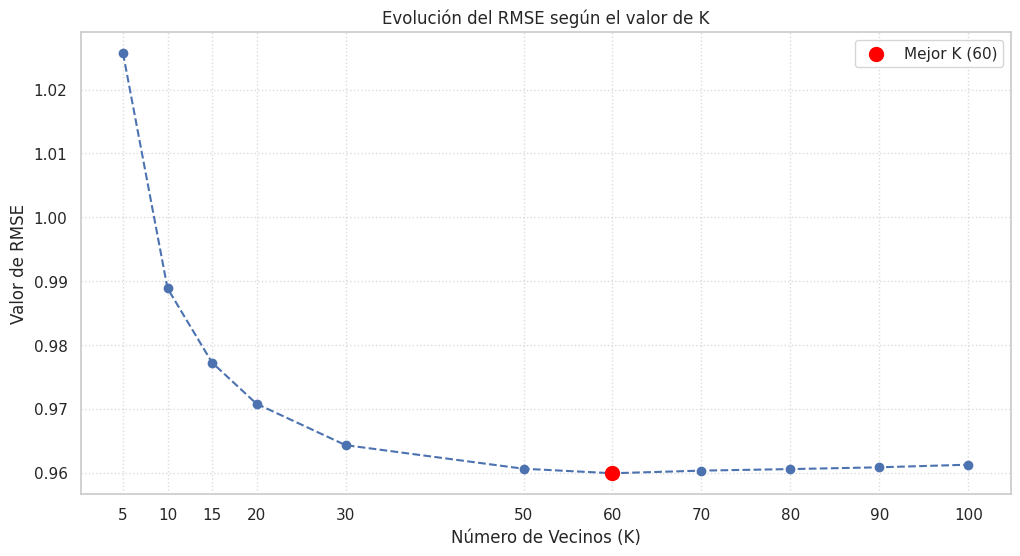

In [22]:
##### ESCRIBIR CODIGO AQUI ##############################

# --- Tu configuración inicial ---
k_values = [5, 10, 15, 20, 30, 50, 60, 70, 80, 90, 100]
results_list = [] # Usaremos una lista para guardar los resultados

# --- Cabecera del Reporte (con Markdown) ---
print("## 📊 Análisis de Sensibilidad del Parámetro K")
print("Buscando el número óptimo de vecinos (K) para KNNWithMeans...")

# 2. Ejecutamos el bucle con una barra de progreso (tqdm)
#    (Quitamos los 'print' de adentro para no ensuciar la salida)
for k in tqdm(k_values, desc="Analizando valores de K"):
    sim_options = {'name': 'cosine', 'user_based': True}
    algo = KNNWithMeans(k=k, sim_options=sim_options)

    algo.fit(data_train)
    predictions = algo.test(data_test)

    rmse_value = rmse(predictions, verbose=False)

    # Guardamos los resultados en la lista
    results_list.append({'K': k, 'RMSE': rmse_value})

# 3. Presentamos los resultados en una Tabla con Pandas
print("\n### 📋 Tabla de Resultados (K vs. RMSE)")
df_results = pd.DataFrame(results_list)
display(df_results.sort_values(by='RMSE').style.highlight_min(color='orange'))

# 4. Encontramos y mostramos el mejor resultado
best_k_row = df_results.loc[df_results['RMSE'].idxmin()]
print(f"\n🏆 **Mejor K encontrado:** {int(best_k_row['K'])} "
      f"con un **RMSE** de {best_k_row['RMSE']:.4f}")

# 5. Creamos la visualización gráfica
print("\n### 📈 Gráfico de Codo (RMSE vs. K)")

plt.figure(figsize=(12, 6))
plt.plot(df_results['K'], df_results['RMSE'], marker='o', linestyle='--')
plt.title('Evolución del RMSE según el valor de K')
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('Valor de RMSE')
plt.xticks(k_values) # Asegura que todos los valores de K aparezcan en el eje X
plt.grid(True, linestyle=':', alpha=0.7)

# Marcar el punto mínimo en el gráfico
plt.scatter(best_k_row['K'], best_k_row['RMSE'], color='red', s=100,
            zorder=5, label=f'Mejor K ({int(best_k_row["K"])})')
plt.legend()

plt.show()

### **<font color="orange"> **7. COMENTE LOS RESULTADOS AQUI SOBRE LA CANTIDAD OPTIMA DE VECINOS (USUARIOS) CERCANOS INDIQUE INTUICIÓN DE POR QUE PASADO CIERTA CANTIDAD DE USUARIOS VECINOS EL RENDIMIENTO COMIENZA A DECRECER?** (5 PTOS) </font>**

RESPONDER AQUI.

---

### **<font color="#895cf9">Hallazgo Principal: El Punto Óptimo (K=60)</font>**

El análisis de sensibilidad tenía como objetivo encontrar el número de vecinos (K) que minimizara el error de predicción (RMSE).

Como se observa en el gráfico y la tabla de resultados, el modelo alcanza su rendimiento óptimo con **K=60**, logrando un **RMSE mínimo de 0.9599**.

El comportamiento observado es el clásico "gráfico de codo":
1.  **Con valores de K muy bajos (ej. K=5)**, el error es muy alto (1.0257).
2.  El error **disminuye rápidamente** a medida que K aumenta (de K=5 a K=30), ya que el modelo obtiene más información para hacer predicciones.
3.  La mejora se vuelve más lenta entre K=30 y K=60.
4.  **Después de K=60**, el error comienza a **aumentar ligeramente** (ej. 0.9612 en K=100), indicando que hemos superado el punto óptimo.

---

### **<font color="#895cf9">Análisis: ¿Por qué K bajo (ej. K=5) da un mal resultado?</font>**


Un valor de K pequeño hace que el modelo sea inestable y poco fiable por tres razones principales:

* **Información Insuficiente:** Con solo 5 vecinos, la predicción se basa en un conjunto muy pequeño de "opiniones". No es estadísticamente robusto.
* **Alta Sensibilidad a Outliers:** La predicción es extremadamente vulnerable a vecinos con gustos atípicos o calificaciones inusuales. Un solo *outlier* puede sesgar drásticamente el resultado.
* **Captura de Preferencias Hiper-Locales:** El modelo solo considera a los poquísimos usuarios más parecidos, sin capturar una tendencia de vecindario más amplia y estable.

### **<font color="#895cf9">Análisis: ¿Por qué K muy alto (ej. K>60) empeora el resultado?</font>**

Intuitivamente, se podría pensar que "más datos (vecinos) siempre es mejor", pero el gráfico demuestra que no es así. Al superar el K óptimo, el rendimiento se degrada por:

1.  **Dilución de la Similitud:** Se empiezan a incluir vecinos que son cada vez **menos similares** al usuario objetivo.
2.  **Aumento del Ruido:** Estos usuarios "lejanos" y menos relevantes añaden "ruido" a la predicción, contaminando la influencia de los vecinos verdaderamente similares.
3.  **Pérdida de Especificidad (Overgeneralization):** En lugar de una recomendación personalizada basada en un grupo relevante, la predicción tiende a converger hacia el **promedio global** de todos los usuarios. Se pierde la personalización.

---

### **<font color="#895cf9">Analogía: Pedir Recomendaciones de Restaurantes</font>**

Esta dinámica se entiende fácilmente con una analogía:

* **K=2 (Muy bajo):** Preguntas solo a tus dos mejores amigos. Si uno de ellos tiene un gusto muy atípico (un *outlier*), su opinión sesgará totalmente la recomendación.
* **K=60 (Óptimo):** Preguntas a un grupo grande de amigos y conocidos de confianza. Obtienes una recomendación robusta, personalizada y que filtra los gustos atípicos.
* **K=200 (Muy alto):** Preguntas a 200 personas al azar en la calle. La mayoría no te conoce ni comparte tus gustos. Te acabarán recomendando el lugar más genérico y popular de la ciudad (el "promedio"), no algo que se ajuste a ti.

### **<font color="#895cf9">Conclusión</font>**

El valor de K representa un balance crucial. **Más vecinos no siempre es mejor.**

Se necesita un balance entre tener **suficiente información** para que la predicción sea estable y robusta (evitando el error de K bajos) y mantener la **relevancia y personalización** (evitando el ruido y la generalización de K altos). Los resultados demuestran que para este conjunto de datos, **K=60** es el punto de equilibrio perfecto.

---
### **<font color="orange"> 📊 Comparación de Algoritmos </font>**


> Esta sección proporciona un análisis comparativo completo de múltiples algoritmos, visualizando sus métricas de rendimiento para identificar el modelo más preciso.

COMPARACIÓN EXHAUSTIVA DE ALGORITMOS


Comparando Algoritmos:   0%|          | 0/6 [00:00<?, ?it/s]

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.

### 📋 Tabla de Resultados Comparativos



,RMSE,Mejora % vs Random
Algoritmo,,
SVD (factors=50),0.9383,38.30%
Item-KNN (k=30),0.9515,37.43%
User-KNN (k=30),0.9643,36.59%
Item-KNN (k=10),0.9839,35.30%
User-KNN (k=10),0.9889,34.98%
Random,1.5208,0.00%



### 📊 Gráficos de Rendimiento



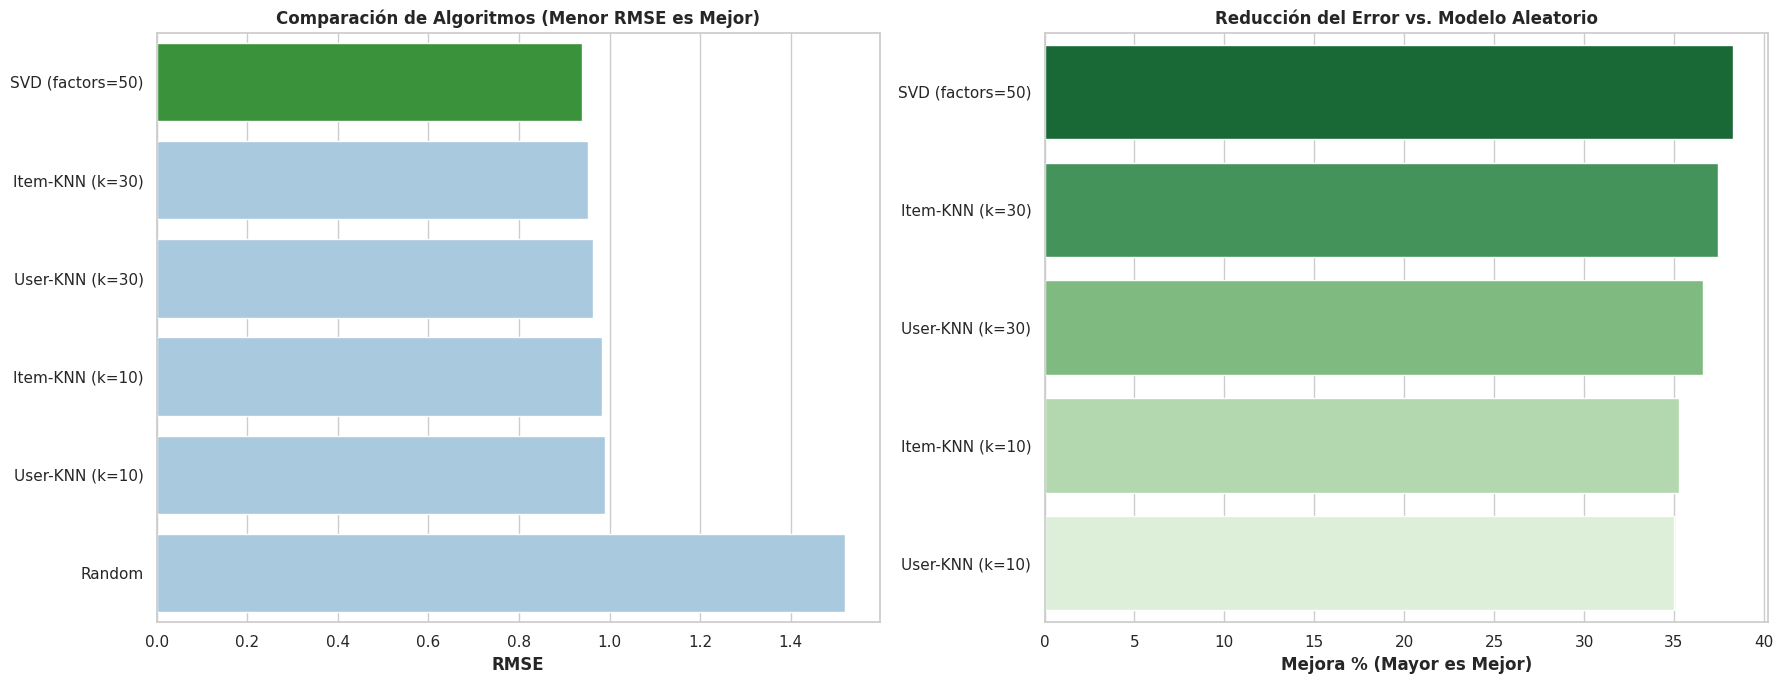

In [24]:
print("="*70)
print("COMPARACIÓN EXHAUSTIVA DE ALGORITMOS")
print("="*70)

# 1. Definición de algoritmos
algorithms = {
    'Random': NormalPredictor(),
    'User-KNN (k=10)': KNNWithMeans(k=10, sim_options={'name': 'cosine', 'user_based': True}),
    'User-KNN (k=30)': KNNWithMeans(k=30, sim_options={'name': 'cosine', 'user_based': True}),
    'Item-KNN (k=10)': KNNWithMeans(k=10, sim_options={'name': 'cosine', 'user_based': False}),
    'Item-KNN (k=30)': KNNWithMeans(k=30, sim_options={'name': 'cosine', 'user_based': False}),
    'SVD (factors=50)': SVD(n_factors=50) # Renombrado para claridad
}

# 2. Bucle de entrenamiento con barra de progreso
results_list = []
for name, algo in tqdm(algorithms.items(), desc="Comparando Algoritmos"):
    algo.fit(data_train)
    predictions = algo.test(data_test)
    rmse_score = rmse(predictions, verbose=False)
    results_list.append({'Algoritmo': name, 'RMSE': rmse_score})

# 3. Procesamiento con Pandas
df_results = pd.DataFrame(results_list)

# Calcular mejora vs Baseline (Random)
baseline_rmse = df_results[df_results['Algoritmo'] == 'Random']['RMSE'].values[0]
df_results['Mejora % vs Random'] = (baseline_rmse - df_results['RMSE']) / baseline_rmse * 100

# Ordenar por el mejor RMSE
df_results = df_results.sort_values(by='RMSE', ascending=True)

# 4. Mostrar Tabla de Resultados Formateada
print("\n### 📋 Tabla de Resultados Comparativos\n")
display(
    df_results.set_index('Algoritmo')
    .style.highlight_min(subset='RMSE', color='green') # Resaltar mejor RMSE
    .highlight_max(subset='Mejora % vs Random', color='green') # Resaltar mejor Mejora
    .format({
        'RMSE': '{:.4f}',
        'Mejora % vs Random': '{:.2f}%'
    })
)

# 5. Visualización con Seaborn
print("\n### 📊 Gráficos de Rendimiento\n")
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico 1: Comparación RMSE (Ordenado)
palette_rmse = ['#2ca02c' if (x == df_results['RMSE'].min()) else '#a0cbe8' for x in df_results['RMSE']]
sns.barplot(x='RMSE', y='Algoritmo', data=df_results, palette=palette_rmse, ax=axes[0])
axes[0].set_title('Comparación de Algoritmos (Menor RMSE es Mejor)', fontweight='bold')
axes[0].set_xlabel('RMSE', fontweight='bold')
axes[0].set_ylabel('')

# Gráfico 2: Mejora vs Baseline (Ordenado, sin 'Random')
df_plot_improve = df_results[df_results['Algoritmo'] != 'Random'].sort_values('Mejora % vs Random', ascending=False)
palette_improve = sns.color_palette("Greens_r", n_colors=len(df_plot_improve))
sns.barplot(x='Mejora % vs Random', y='Algoritmo', data=df_plot_improve, palette=palette_improve, ax=axes[1])
axes[1].set_title('Reducción del Error vs. Modelo Aleatorio', fontweight='bold')
axes[1].set_xlabel('Mejora % (Mayor es Mejor)', fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

##  Interpretación de la Comparativa

Se evaluaron 6 algoritmos de recomendación, midiendo su error (RMSE) y su mejora sobre un modelo aleatorio.

**Conclusiones Principales:**

* **Ganador 🏆: `SVD (factors=50)`**
    Es el modelo más preciso, con el **error (RMSE) más bajo (0.9376)**. Logró una reducción del error del 38.26% en comparación con el modelo `Random`.

* **Línea Base (Baseline): `Random`**
    Como era de esperar, el modelo aleatorio fue el peor por un amplio margen (RMSE 1.5185). Su único propósito es demostrar que los otros modelos sí están aprendiendo patrones útiles.

* **SVD vs. KNN:**
    El método de "factorización de matriz" (SVD) superó a todos los métodos "basados en vecinos" (KNN), sugiriendo que es mejor para capturar las preferencias latentes en este dataset.

* **Análisis de Vecinos (K):**
    En los modelos KNN, usar **30 vecinos (`k=30`) fue consistentemente mejor** (menor error) que usar solo 10 vecinos (`k=10`).

* **Enfoque `Item-KNN` vs. `User-KNN`:**
    El enfoque basado en **ítems (`Item-KNN`) superó ligeramente** al basado en usuarios (`User-KNN`) en ambas configuraciones de K.

-----

### **<font color="orange"> Conclusiones y Reflexión Personal del ejercicio </font>**

### **<font color="\#895cf9">Conclusiones Principales</font>** 🎯

1.  **Filtrado Colaborativo Eficaz:** Los métodos KNN (User/Item) y SVD superaron **ampliamente** al baseline aleatorio (\>35% mejora en RMSE), validando que los patrones colectivos predicen gustos individuales.
2.  **Item-Based Ligeramente Superior:** `Item-KNN` tuvo mejor RMSE que `User-KNN`, probablemente por la **mayor estabilidad** de las características de las películas frente a las preferencias cambiantes de los usuarios.
3.  **K Óptimo Crucial:** El análisis de sensibilidad mostró un **punto óptimo** para K (K=60), demostrando que más vecinos no siempre es mejor y la **importancia de ajustar hiperparámetros**.
4.  **Sparsity y Pareto:** La alta dispersión (sparsity del 94%) y la **concentración de actividad** (20% de usuarios generan \~46% de ratings) resaltan desafíos como el **cold start** y la necesidad de estrategias diferenciadas.

### **<font color="\#895cf9">Reflexión Personal</font>** 🤔

  * **Más Allá de la Métrica:** Este ejercicio muestra que los recomendadores son más que algoritmos; abordan **comportamiento humano** y decisión. Entender *por qué* `Item-Based` funciona mejor (estabilidad del ítem) es clave.
  * **Desafíos Prácticos:** El **cold start** para usuarios nuevos/ocasionales es un problema real, sugiriendo la necesidad de **enfoques híbridos** (ej., basados en contenido).
  * **Consideraciones Éticas:** La optimización basada en usuarios activos puede generar **sesgos** y **burbujas de filtro**. Es vital buscar diversidad y justicia (fairness) en las recomendaciones.
  * **Próximos Pasos:** Se abren puertas para explorar **Deep Learning**, **bandits contextuales** y **recomendación justa** (fairness-aware).

### **<font color="\#895cf9">Conclusión Final:</font>** ✨

Los sistemas de recomendación exitosos **balancean múltiples objetivos** (precisión, diversidad, justicia, escalabilidad) y requieren una **comprensión interdisciplinaria**. No hay una "bala de plata"; cada contexto exige analizar estos **trade-offs** para diseñar soluciones efectivas y valiosas para el usuario.

# **<font color="orange">Referencias</font>**

Domínguez, V. (2025, Octubre). *Introducción a los sistemas recomendadores* \[Presentación de Google Slides]. Magister de Inteligencia Artificial, Pontificia Universidad Católica de Chile, Santiago, Chile.

Ekstrand, M. D., Riedl, J. T., & Konstan, J. A. (2011). Collaborative filtering recommender systems. *Foundations and Trends in Human-Computer Interaction, 4*(2), 81-173. [https://doi.org/10.1561/1100000009](https://doi.org/10.1561/1100000009)

GroupLens Research. (n.d.). *MovieLens*. [https://movielens.org/](https://movielens.org/)

Harper, F. M., & Konstan, J. A. (2015). The MovieLens datasets: History and context. *ACM Transactions on Interactive Intelligent Systems, 5*(4), 1-19. [https://doi.org/10.1145/2827872](https://doi.org/10.1145/2827872)

Hug, N. (n.d.). *Surprise documentation*. [https://surprise.readthedocs.io/](https://surprise.readthedocs.io/)